# 線性迴歸

### 迴歸

    線性迴歸
      y(x)=w0+w1x
    
    多項式迴歸
      y(x)=w0+w1x+w2x^2+...+wnx^n
    
    多元迴歸
      在線性中的線 -> 要用最小平方法求出，取兩個類別距離最近者

### 公式

Y = a + b*X + e
  
    a 是 Y軸的截距
  
    b 是 迴歸斜距
  
    e 是 誤差

### 例子

油價會影響開車的人數

干擾因子: 經濟能力、年齡

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# 線性回歸模組
from sklearn.linear_model import LinearRegression

#### 溫度與冰的走勢圖

In [2]:
# 溫度
temperatures = np.array([29,28,34,31,25,29,32,21,24,33,25,31,26,30])
# 冰的銷售量
ice = np.array([77,62,93,84,59,64,80,75,58,91,51,73,65,84])



In [3]:
# 改變大小
n = np.reshape(temperatures, (len(temperatures),1))
# np.reshape(欲改變的來源, (組數,幾個為一組))
n

array([[29],
       [28],
       [34],
       [31],
       [25],
       [29],
       [32],
       [21],
       [24],
       [33],
       [25],
       [31],
       [26],
       [30]])

In [4]:
n1 = np.reshape(temperatures, (len(temperatures)//2,2))
# np.reshape(欲改變的來源, (組數,幾個為一組))
n1

array([[29, 28],
       [34, 31],
       [25, 29],
       [32, 21],
       [24, 33],
       [25, 31],
       [26, 30]])

In [5]:
# 建模: 線性迴歸
lr = LinearRegression()

In [6]:
# 訓練
lr.fit(
    np.reshape(
      temperatures, (len(temperatures),1)),
    np.reshape(
      ice, (len(ice), 1))
    )

LinearRegression()

In [7]:
# 預測
newTemp = ([30])
# 怎麼訓練就需怎麼預測(改變大小)
sales = lr.predict(np.reshape(newTemp, (len(newTemp),1)))
sales

array([[76.47457627]])

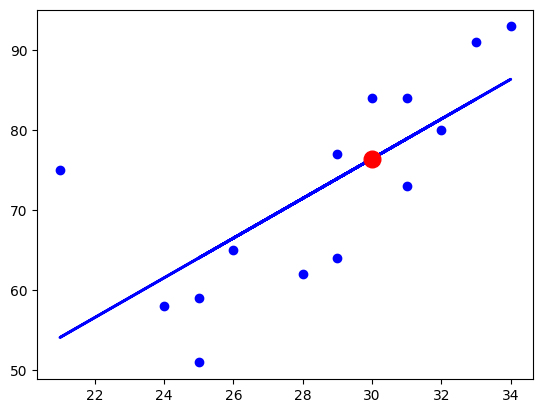

In [8]:
# 預估線
# 畫散圖(溫度與冰的分布圖)
plt.scatter(temperatures, ice, color='blue')
# 畫線
plt.plot(temperatures, lr.predict(np.reshape(temperatures, (len(temperatures),1))), color='blue', linewidth=2)

# 新溫度預測落點
plt.plot(newTemp, sales, color='r', marker='o', markersize=12)

#### 油價與大眾運輸使用率的關係

In [9]:
import pandas as pd
# 油價(倍數)
x_values = pd.DataFrame([1,2,3,4])
# 大眾運輸使用率
y_values = pd.DataFrame([0,0.3,0.6,0.9])
x_test = pd.DataFrame([1.5,3,5])

x_values

,0
0,1
1,2
2,3
3,4


In [10]:
# 建模(整體走勢)
reg = LinearRegression()

In [11]:
# 訓練
reg.fit(x_values, y_values)

LinearRegression()

In [12]:
# 預測
y_test_predict = reg.predict(x_test)
y_test_predict

array([[0.15],
       [0.6 ],
       [1.2 ]])

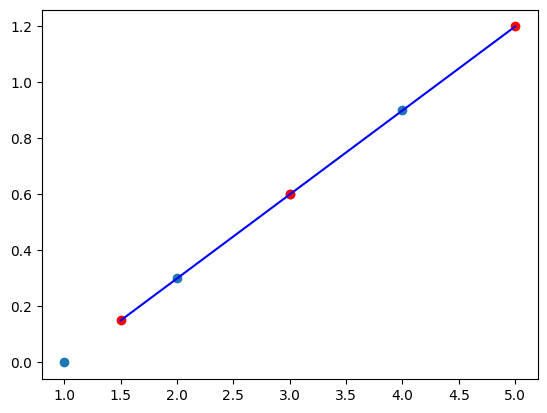

In [13]:
# 預測圖
# 畫散圖
plt.scatter(x_values, y_values)
# 測試點與預測點的散圖(紅色)
plt.scatter(x_test, y_test_predict, color='r')
# 畫測試點折線圖
plt.plot(x_test, y_test_predict, color='b')
plt.show()

上突為線性回歸的一種

x軸 自變數 ， y軸 應變數

定性 點須落在線上 --> 最佳配適線( 公式: y1=b0+b1x1 )
                    *b0是y1的截距，b1是斜率


範例:

y = 2 + 5x

  當x為1，y的截距為2

當斜率為0，y為水平線

#### 台積電的股票分析(線性迴歸)

In [14]:
# 將雲端硬碟掛進來
from google.colab import drive
drive.mount('/content/drive')
# 從證券交易所載下來的資料
# https://www.twse.com.tw/zh/trading/historical/stock-day.html

Mounted at /content/drive


In [15]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [16]:
# 資料路徑
path='/content/drive/MyDrive/2023聯成電腦/Python IV 視覺辨識與機器學習/0109_0111_0116/TSMC'
# 更換目錄
os.chdir(path)
# 給予所有的資料
file_list = os.listdir()
# 排序
file_list.sort()
file_list

['STOCK_DAY_2330_202207.csv',
 'STOCK_DAY_2330_202208.csv',
 'STOCK_DAY_2330_202209.csv',
 'STOCK_DAY_2330_202210.csv',
 'STOCK_DAY_2330_202211.csv',
 'STOCK_DAY_2330_202212.csv',
 'STOCK_DAY_2330_202301.csv',
 'STOCK_DAY_2330_202302.csv',
 'STOCK_DAY_2330_202303.csv',
 'STOCK_DAY_2330_202304.csv',
 'STOCK_DAY_2330_202305.csv',
 'STOCK_DAY_2330_202306.csv',
 'STOCK_DAY_2330_202307.csv',
 'STOCK_DAY_2330_202308.csv',
 'STOCK_DAY_2330_202309.csv',
 'STOCK_DAY_2330_202310.csv',
 'STOCK_DAY_2330_202311.csv',
 'STOCK_DAY_2330_202312.csv',
 'STOCK_DAY_2330_202401.csv']

In [17]:
# 整理資料，抓取需要的欄位
df = open(path+"/"+file_list[0])
# 讀取第一行(將不需要資訊讀取掉)
data = df.readline()
data = pd.read_csv(df)
data

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,Unnamed: 9
0,111/07/01,"72,597,018","33,459,624,760",471.5,474.0,452.5,453.5,-22.5,"172,267",NaN
1,111/07/04,"61,206,245","27,225,872,277",443.0,451.5,440.0,440.0,-13.5,"96,760",NaN
2,111/07/05,"55,469,884","24,538,415,224",449.5,451.5,433.0,446.0,6.0,"70,715",NaN
3,111/07/06,"42,156,925","18,556,660,847",442.0,447.5,435.0,435.5,-10.5,"59,018",NaN
4,111/07/07,"50,984,110","22,992,311,966",442.0,459.0,438.5,457.5,22.0,"56,227",NaN
5,111/07/08,"39,134,398","18,251,251,558",470.0,470.5,461.5,467.0,9.5,"46,039",NaN
6,111/07/11,"22,930,675","10,673,806,551",468.0,470.5,461.0,462.0,-5.0,"25,631",NaN
7,111/07/12,"24,155,935","10,932,798,847",458.0,458.0,449.5,449.5,-12.5,"34,431",NaN
8,111/07/13,"48,134,139","22,639,696,871",470.5,473.0,466.0,470.5,21.0,"48,964",NaN
9,111/07/14,"34,014,188","16,045,789,881",466.0,477.5,463.0,475.0,4.5,"36,454",NaN


In [18]:
# 整理資料，刪除不需要的欄位與空值NaN
data = data.drop(['日期','Unnamed: 9'], axis=1)
# 整理資料，刪除空值NaN
data = data.dropna()
data

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,"72,597,018","33,459,624,760",471.5,474.0,452.5,453.5,-22.5,"172,267"
1,"61,206,245","27,225,872,277",443.0,451.5,440.0,440.0,-13.5,"96,760"
2,"55,469,884","24,538,415,224",449.5,451.5,433.0,446.0,6.0,"70,715"
3,"42,156,925","18,556,660,847",442.0,447.5,435.0,435.5,-10.5,"59,018"
4,"50,984,110","22,992,311,966",442.0,459.0,438.5,457.5,22.0,"56,227"
5,"39,134,398","18,251,251,558",470.0,470.5,461.5,467.0,9.5,"46,039"
6,"22,930,675","10,673,806,551",468.0,470.5,461.0,462.0,-5.0,"25,631"
7,"24,155,935","10,932,798,847",458.0,458.0,449.5,449.5,-12.5,"34,431"
8,"48,134,139","22,639,696,871",470.5,473.0,466.0,470.5,21.0,"48,964"
9,"34,014,188","16,045,789,881",466.0,477.5,463.0,475.0,4.5,"36,454"


In [19]:
allData = data
for i in range(1,19):
  df = open(path + "/" + file_list[i])
  # 將第一行不要的資料讀掉
  data = df.readline()
  data = pd.read_csv(df)
  # 整理資料，將不要的欄位刪除
  data = data.drop(['日期','Unnamed: 9'], axis=1)
  # 將空值刪除
  data = data.dropna()
  # 資料合併
  allData = pd.concat([allData, data])

allData

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,"72,597,018","33,459,624,760",471.5,474.0,452.5,453.5,-22.5,"172,267"
1,"61,206,245","27,225,872,277",443.0,451.5,440.0,440.0,-13.5,"96,760"
2,"55,469,884","24,538,415,224",449.5,451.5,433.0,446.0,6.0,"70,715"
3,"42,156,925","18,556,660,847",442.0,447.5,435.0,435.5,-10.5,"59,018"
4,"50,984,110","22,992,311,966",442.0,459.0,438.5,457.5,22.0,"56,227"
...,...,...,...,...,...,...,...,...
3,"22,008,878","12,685,460,114",578.0,580.0,574.0,576.0,-4.0,"28,660"
4,"19,270,119","11,232,942,053",582.0,585.0,579.0,583.0,7.0,"19,950"
5,"23,718,766","13,909,252,422",588.0,589.0,583.0,586.0,3.0,"23,975"
6,"13,708,117","8,006,229,126",581.0,586.0,580.0,584.0,-2.0,"16,104"


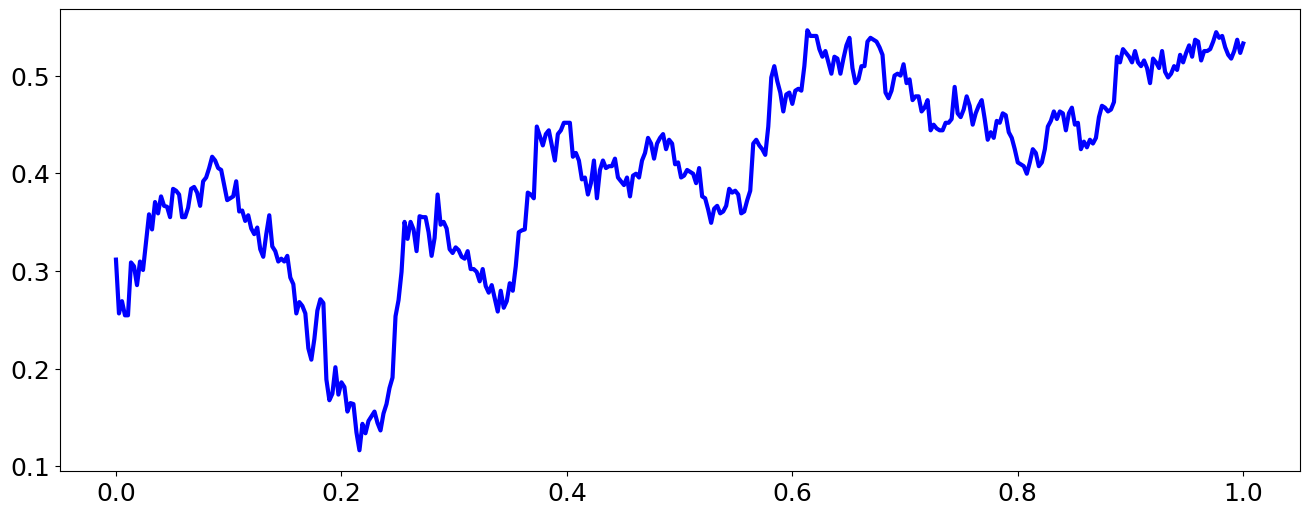

In [20]:
# 圖像視覺化
# 等差數列
# np.linspace(起始點, 終止點, 分的個數)
x = np.linspace(0, 1, len(allData))
# -0.6 為了方便看
y = np.array( allData.iloc[:,2] / np.mean(allData.iloc[:,2]) - 0.6)
# 參數: 表格大小(英吋)
plt.rcParams['figure.figsize'] = (16, 6)
# 畫圖
plt.plot(x,y,'b-', linewidth=3)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [21]:
x1 = np.linspace(0, 1, 20)
x1

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [22]:
y1 = np.array( allData.iloc[:,2] / np.mean(allData.iloc[:,2]) - 0.6)
y1

array([0.31154679, 0.25644799, 0.26901438, 0.2545147 , 0.2545147 ,
       0.30864685, 0.30478027, 0.28544736, 0.3096135 , 0.30091369,
       0.32991305, 0.35794578, 0.34247945, 0.37051217, 0.35891242,
       0.37631204, 0.36664559, 0.36567894, 0.35504584, 0.38404521,
       0.38211191, 0.37824533, 0.35504584, 0.35504584, 0.36471229,
       0.38404521, 0.3859785 , 0.38017862, 0.36664559, 0.39177837,
       0.39564495, 0.40531141, 0.41691116, 0.41304457, 0.40531141,
       0.40337812, 0.38791179, 0.37244546, 0.37437875, 0.37631204,
       0.39177837, 0.36084571, 0.36181236, 0.35117926, 0.35697913,
       0.34344609, 0.33764622, 0.34441274, 0.32217989, 0.31444672,
       0.33764622, 0.35697913, 0.32507983, 0.3202466 , 0.3096135 ,
       0.31251343, 0.3096135 , 0.31541337, 0.29318052, 0.286414  ,
       0.25644799, 0.26804774, 0.26418115, 0.25644799, 0.2206821 ,
       0.20908236, 0.23034856, 0.25934793, 0.27094767, 0.26708109,
       0.1887828 , 0.16751659, 0.17428311, 0.20134919, 0.17331

In [23]:
# 抓取最後一個月的資料
df = open(path+"/"+file_list[-1])
# 讀取第一行(將不需要資訊讀取掉)
data = df.readline()
data = pd.read_csv(df)
# 整理資料，刪除不需要的欄位與空值NaN
data = data.drop(['日期','Unnamed: 9'], axis=1)
# 整理資料，刪除空值NaN
data = data.dropna()

# 等差數列
# x 軸之後(1.0) 希望多畫的值
test_x = np.linspace(len(x)+1, len(x)+len(data), len(data)) * (x[1]-x[0])
test_y = np.array(data.iloc[:,2] / np.mean(allData.iloc[:,2]) - 0.6)


In [24]:
# 說明上述等差數列
print(len(x))
print(len(data))
t_x = np.linspace(len(x)+1, len(x)+len(data), len(data))
print(t_x)
print(x[1])
print(x[0])

376
8
[377. 378. 379. 380. 381. 382. 383. 384.]
0.0026666666666666666
0.0


In [25]:
print(x[1]-x[0])

0.0026666666666666666


##### 練習：時價登錄房價

#### 線性回歸方程式
h(x) = w0 + w1x

線性代數: 權重x Ax=B

將兩邊A TAx =A^TB同乘

=> x = (A^TA)(^-1) A^TB

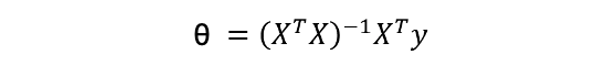

https://cs.wellesley.edu/~cs305/lectures/5_Linear_Regression.pdf

In [26]:
# 演算法
def refresh(X, y, w, a):
  # 權重公式
  dJ = (X.dot(w.T)-y).dot(X)/len(y)

  newW = w - a * dJ
  return newW

#### 多項式迴歸

    n : n次特徵轉換
    a : 學習速度參數
    T : 更新次數
    w : 權重
    X : 資料矩陣

##### 函式

In [27]:
def Polynomial_regression(s, x, y, test_x, test_y):
  n = s + 1
  a = 1
  T = 1000
  X = np.zeros((len(x), n)) # 二維矩陣

  # 產生資料矩陣
  for i in range(n):
    X[:, i] = x ** i

  # 初始化權重
  # np.linalg.inv 逆矩陣: 加起來的數值必須是偶數，否則error(會發生例外)
  w = (np.linalg.inv((X.T).dot(X)).dot(X.T)).dot(y)

  # 紀錄 w 產生的預估值
  plot_yy = X.dot(w.T)
  for t in range(T):
    w = refresh(X, y, w, a)

  plot_y = X.dot(w.T)

  # 計算相差多少
  error = 0
  for k in range(len(y)):
    error += abs(plot_y[k] - y[k])
  error = error / len(y)
  print('訓練錯誤有多少:', error)

  # 產生測試集資料矩陣
  test_X = np.zeros((len(test_x), n))

  # 資料集
  # 產生資料矩陣
  for i in range(n):
    test_X[:,i] = test_x ** i
  pred_error = 0
  pred_y = test_X.dot(w.T)

  # 測試集
  # 計算資料集的錯誤率
  for k in range(len(pred_y)):
    pred_error += abs(pred_y[k] - test_y[k])
  pred_error = pred_error / len(test_y)
  print("測試錯誤有多少:", pred_error)

  # 繪圖
  plt.rcParams['figure.figsize'] = (10, 10)
  plt.plot(x, plot_y, 'g-', linewidth=6, label='fitting')
  plt.plot(test_x, pred_y, 'g-', linewidth=6)
  plt.plot(x, y, 'b-', linewidth=3, label='training data')
  plt.plot(test_x, test_y, 'r-', linewidth=3, label='testing data')
  plt.title('TSMC:' + str(n-1) + 'feature')
  # 圖示 loc=6 中間靠左
  plt.legend(loc=6, fontsize=20)
  # 格線圖
  plt.grid()
  plt.show()
  return error, pred_error

###### 範例(台積電)

訓練錯誤有多少: 0.04845465148273874
測試錯誤有多少: 0.007359485818087569


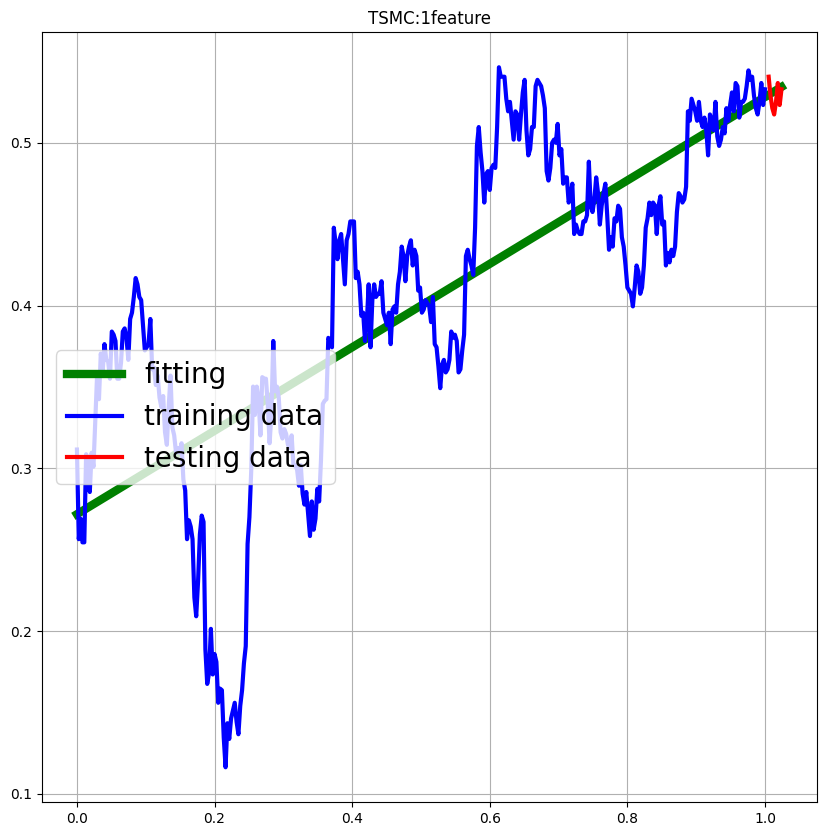

訓練錯誤有多少: 0.048463296343185705
測試錯誤有多少: 0.013238595736252412


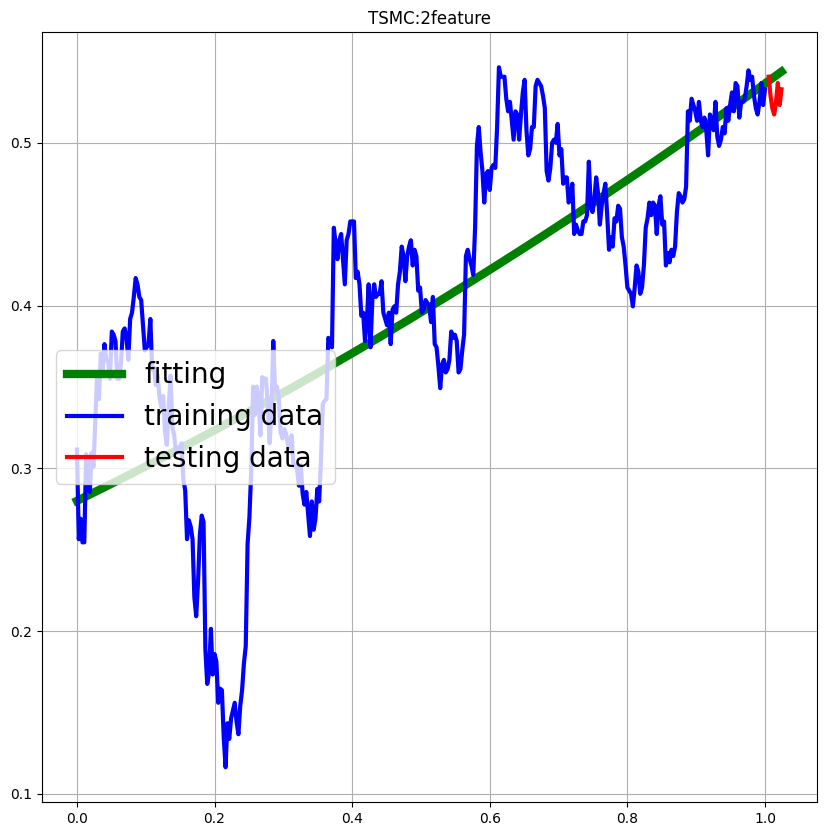

訓練錯誤有多少: 0.048703255575746826
測試錯誤有多少: 0.06249681161021567


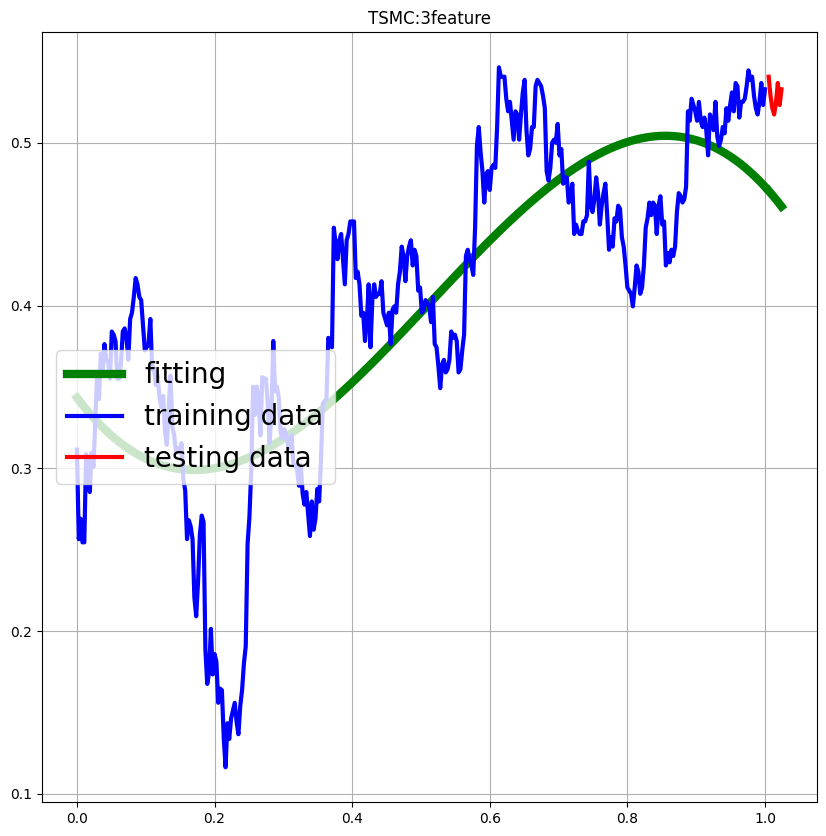

訓練錯誤有多少: 0.0427428277403407
測試錯誤有多少: 0.03102382696483376


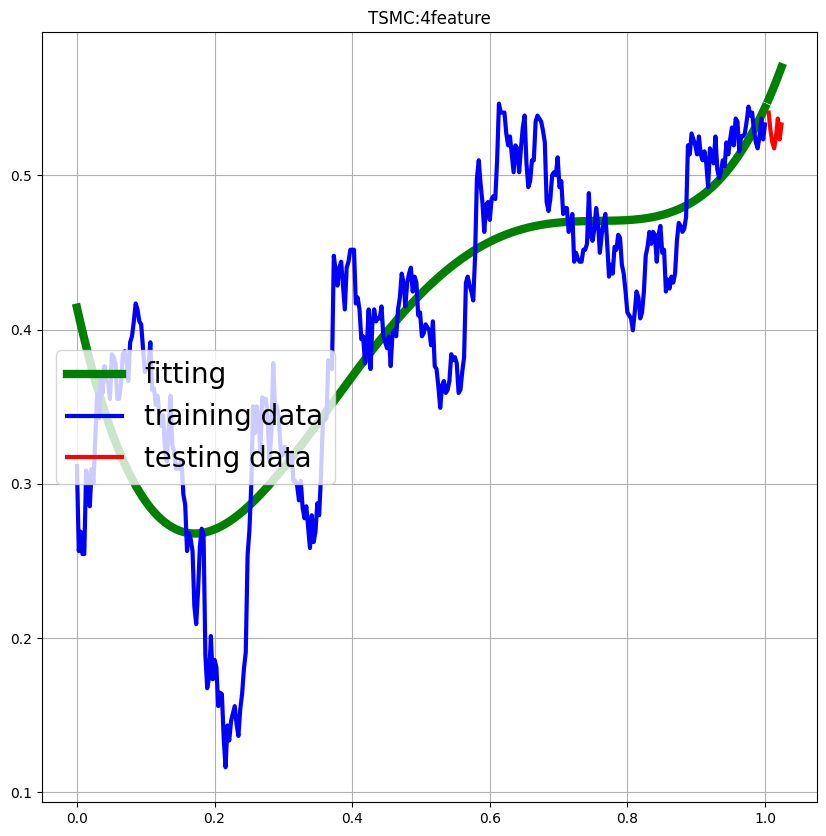

訓練錯誤有多少: 0.04103810278569942
測試錯誤有多少: 0.1068462594261348


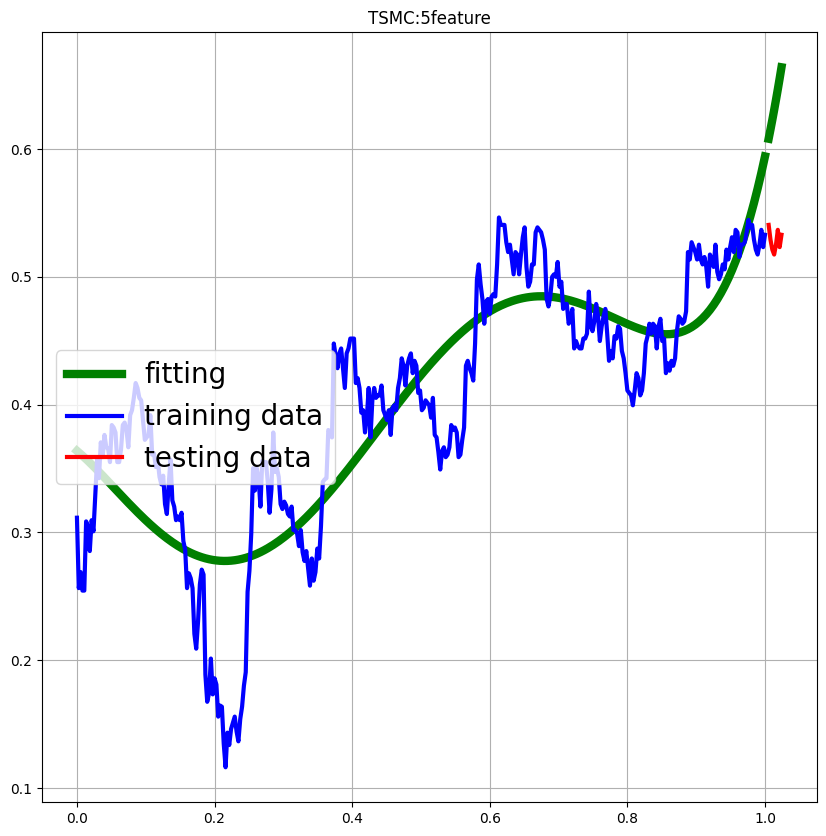

訓練錯誤有多少: 0.03675998310530093
測試錯誤有多少: 0.00852789841440732


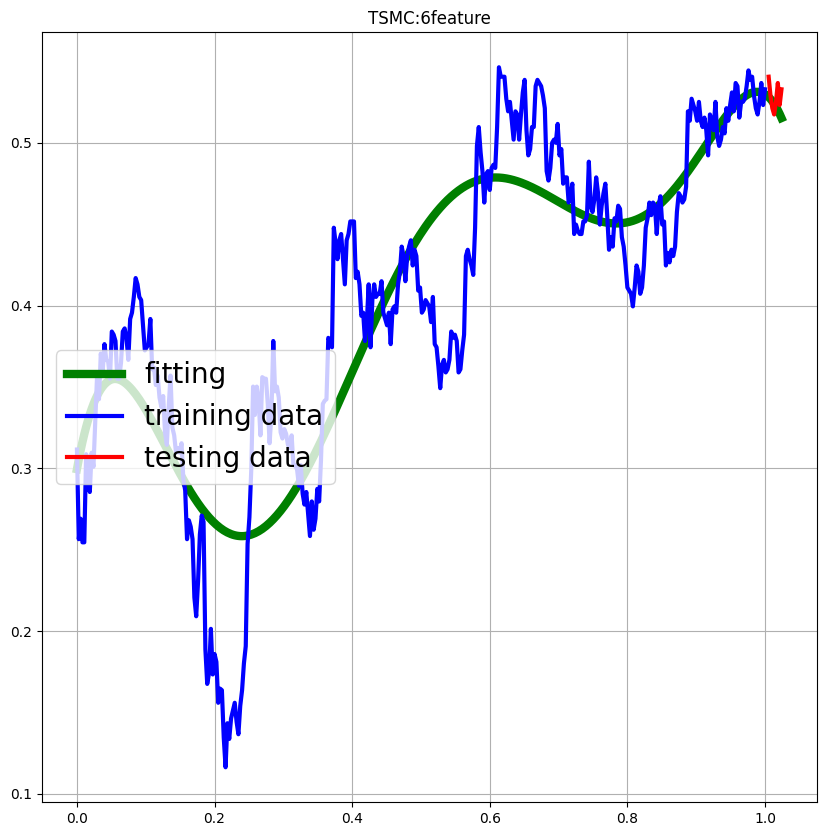

訓練錯誤有多少: 0.03708662313542944
測試錯誤有多少: 0.09355867627373393


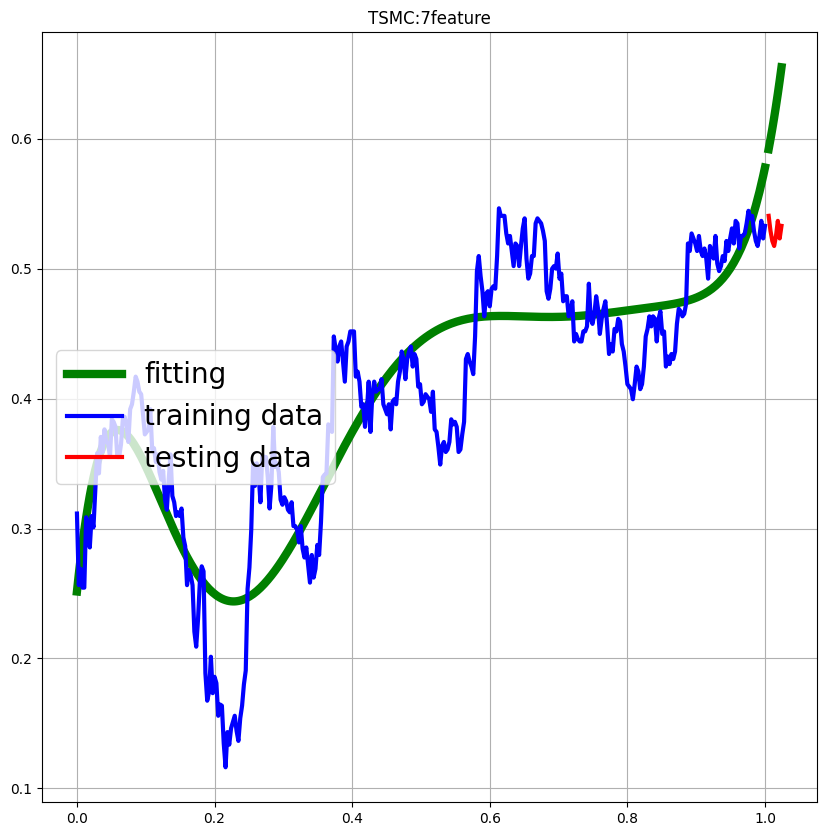

訓練錯誤有多少: 0.033186308936953894
測試錯誤有多少: 0.10967212735469563


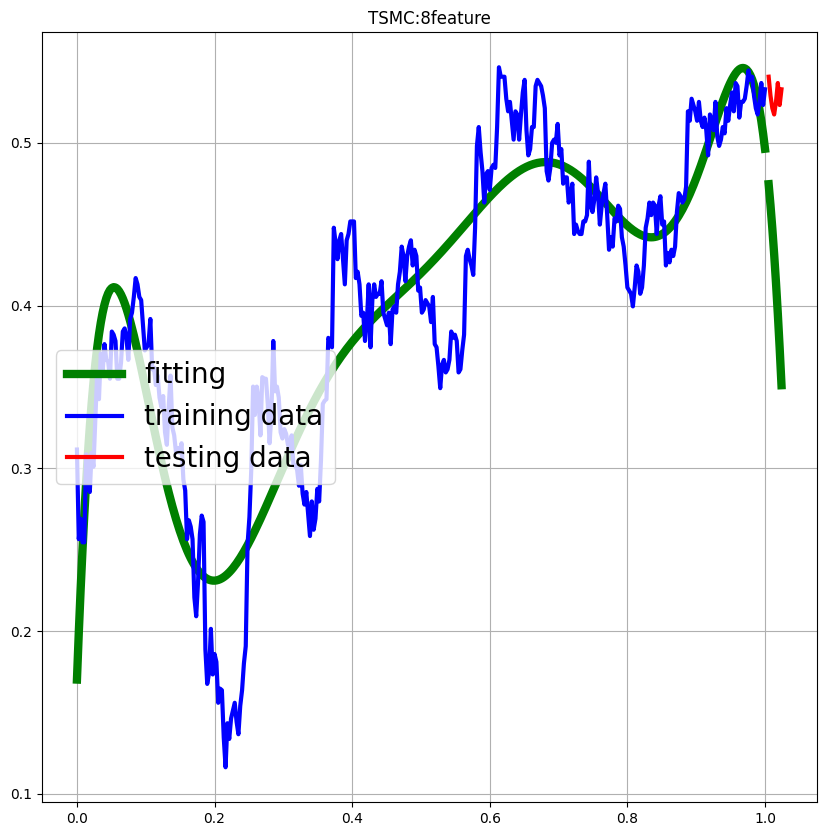

訓練錯誤有多少: 0.033105257170097074
測試錯誤有多少: 0.20124377245901903


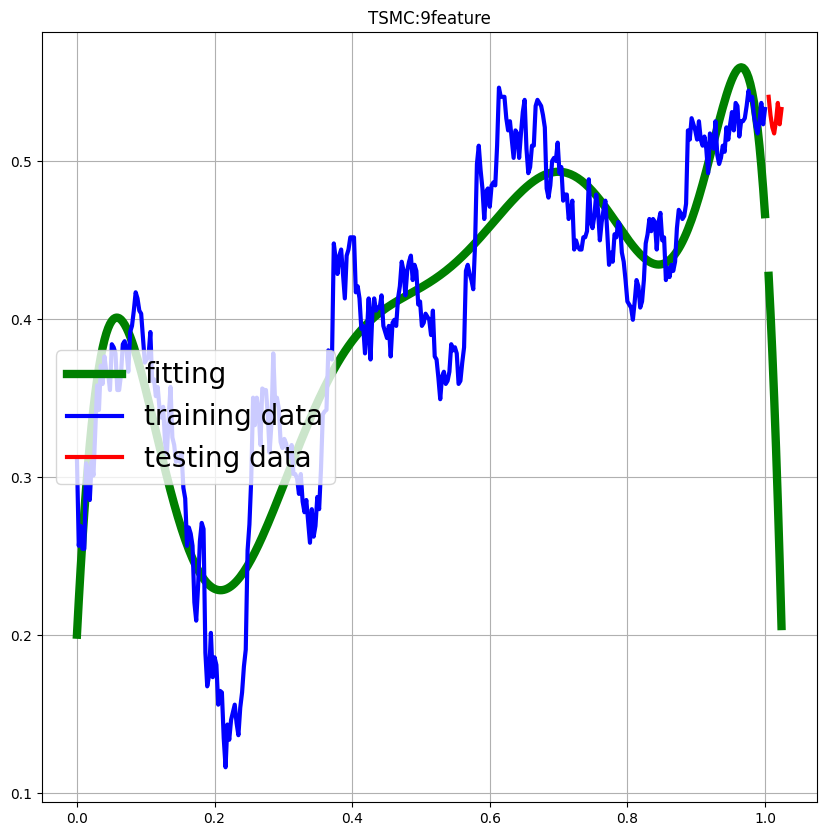

訓練錯誤有多少: 0.02623818432408065
測試錯誤有多少: 0.11518606128463582


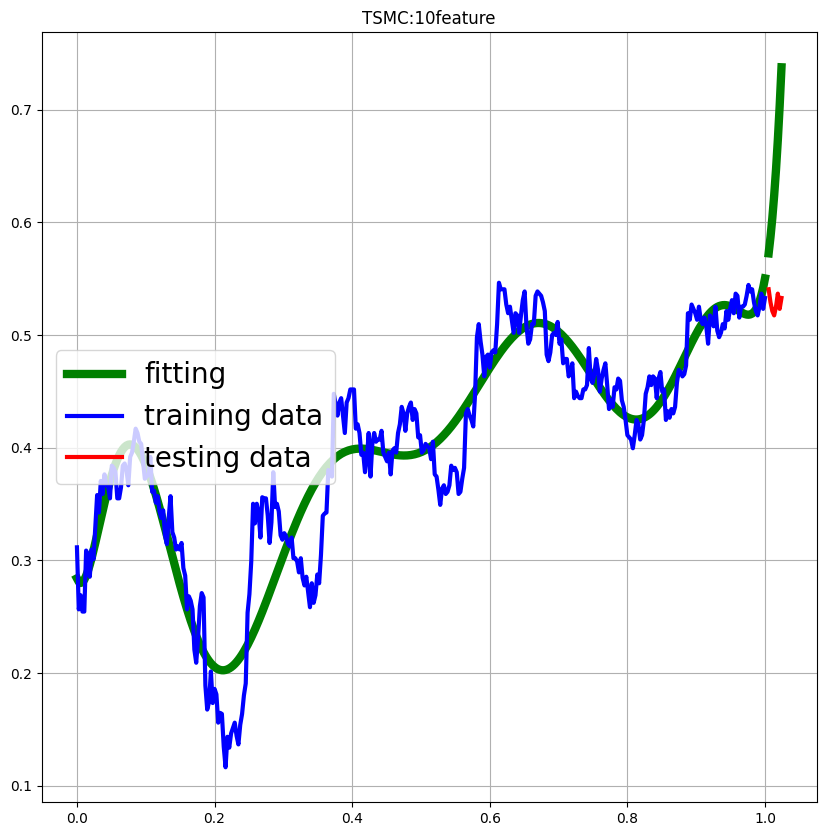

訓練錯誤有多少: 0.02622030239862188
測試錯誤有多少: 0.11236023202416257


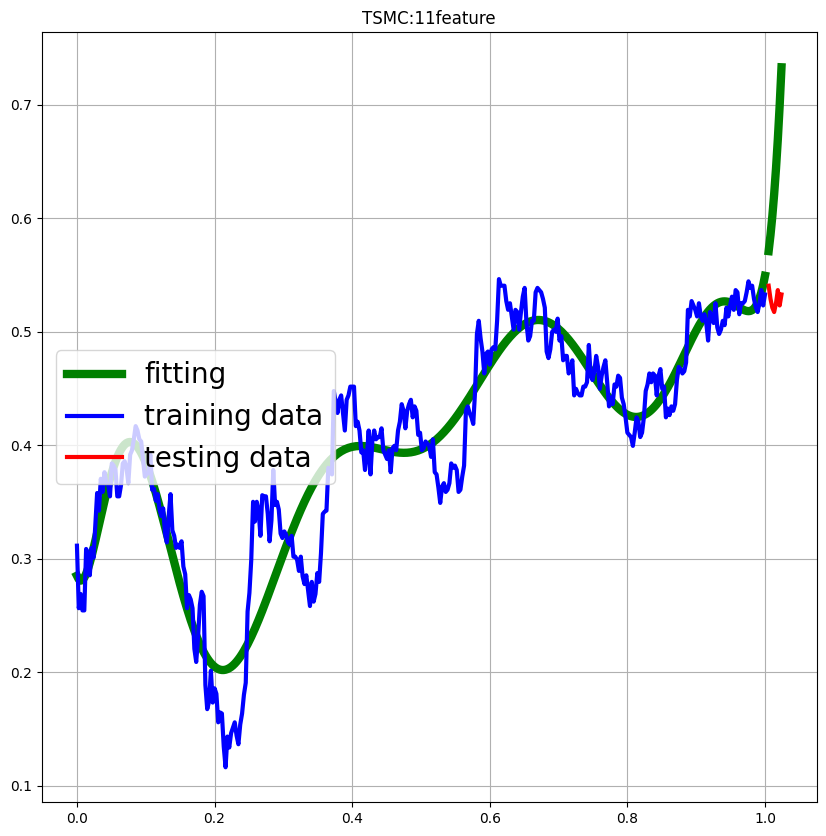

訓練錯誤有多少: 0.026345744601518194
測試錯誤有多少: 0.10004861150672496


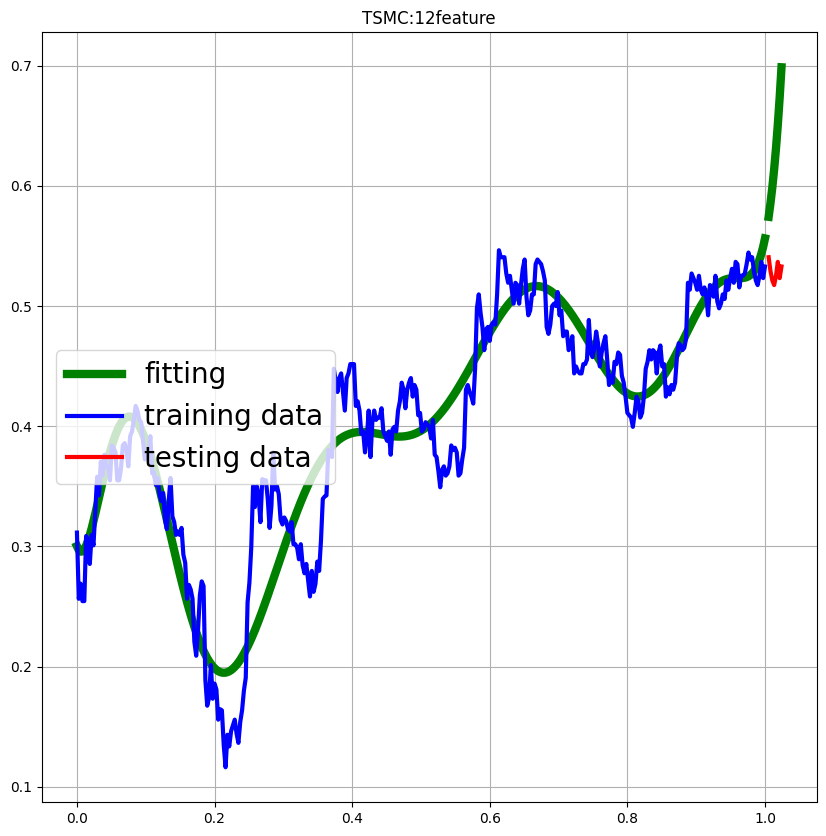

訓練錯誤有多少: 0.026470624464299635
測試錯誤有多少: 0.010788686340606285


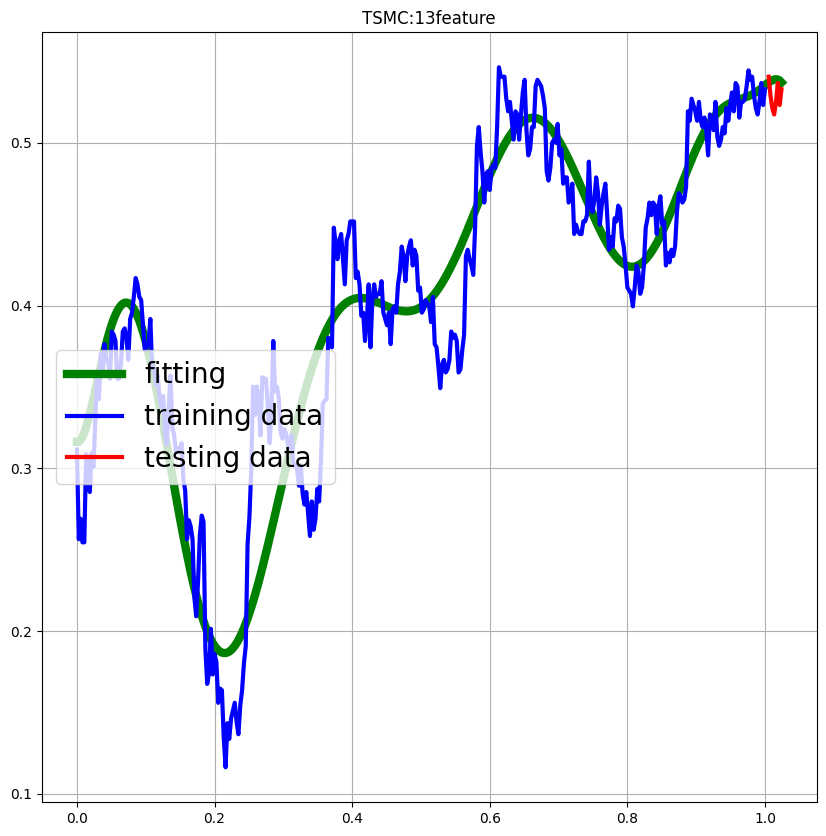

訓練錯誤有多少: 0.07573589059601364
測試錯誤有多少: 0.46702460231806614


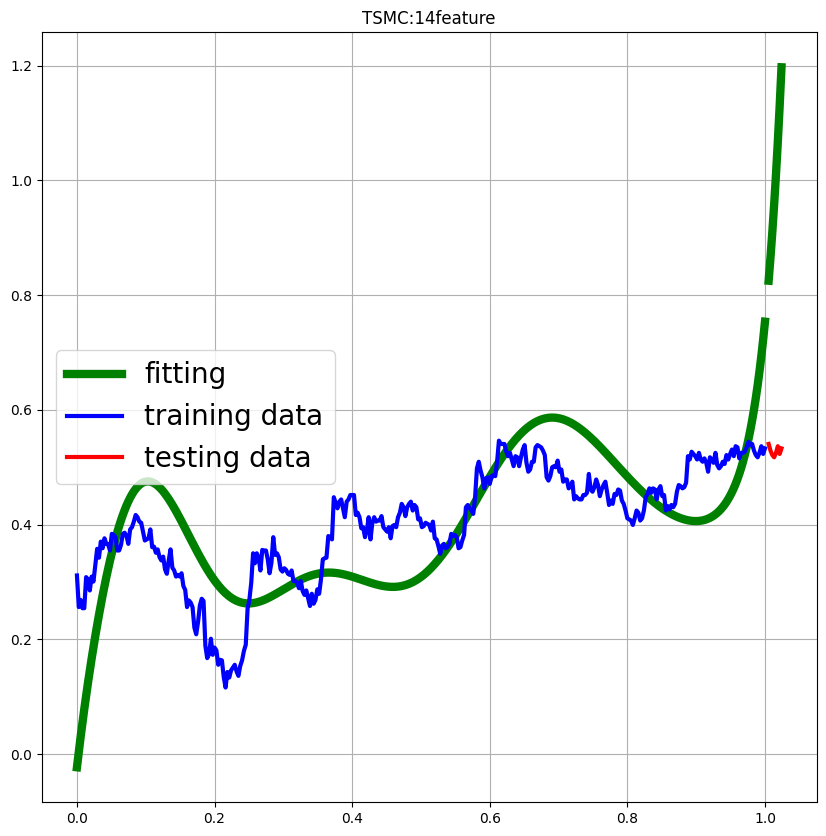

訓練錯誤有多少: 0.06922768966250546
測試錯誤有多少: 0.05509012889694398


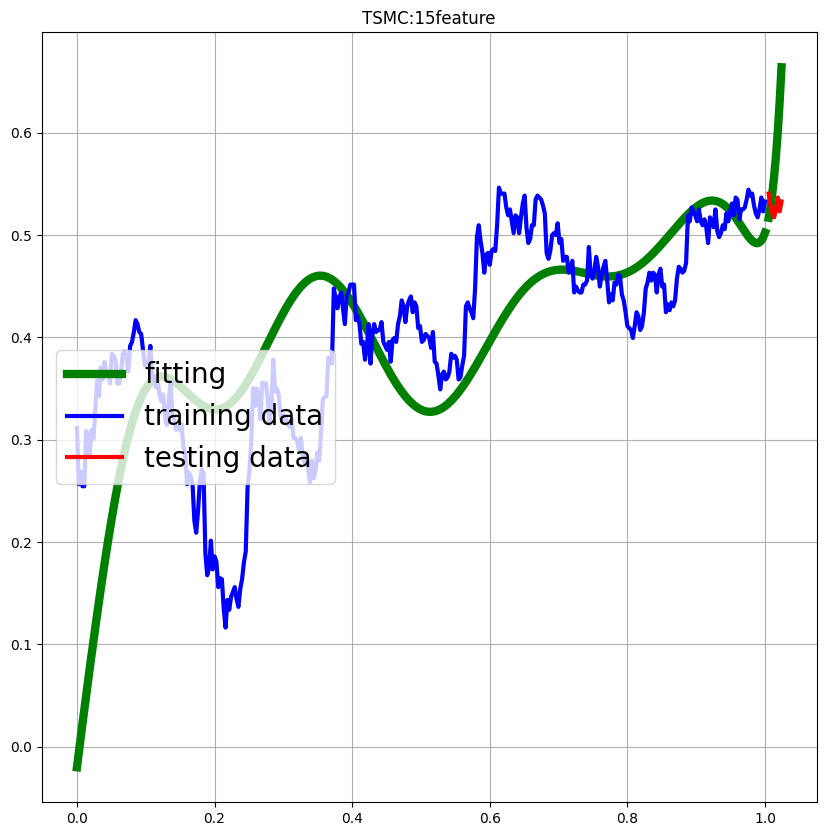

訓練錯誤有多少: 0.03032918931224102
測試錯誤有多少: 0.035474851882187505


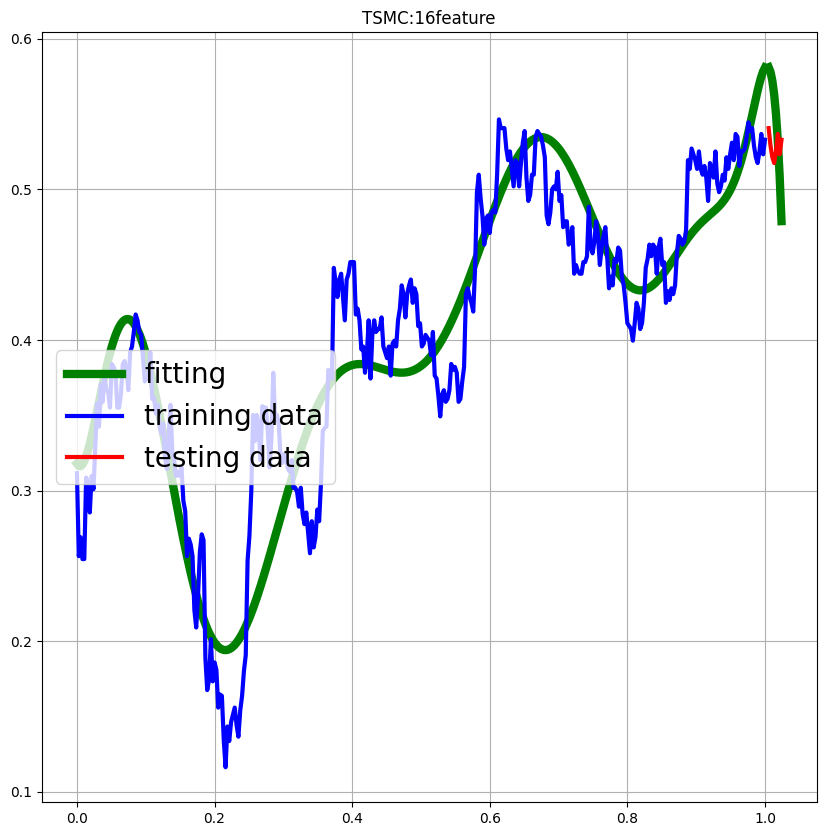

訓練錯誤有多少: 0.02766008820809046
測試錯誤有多少: 0.1051182030231066


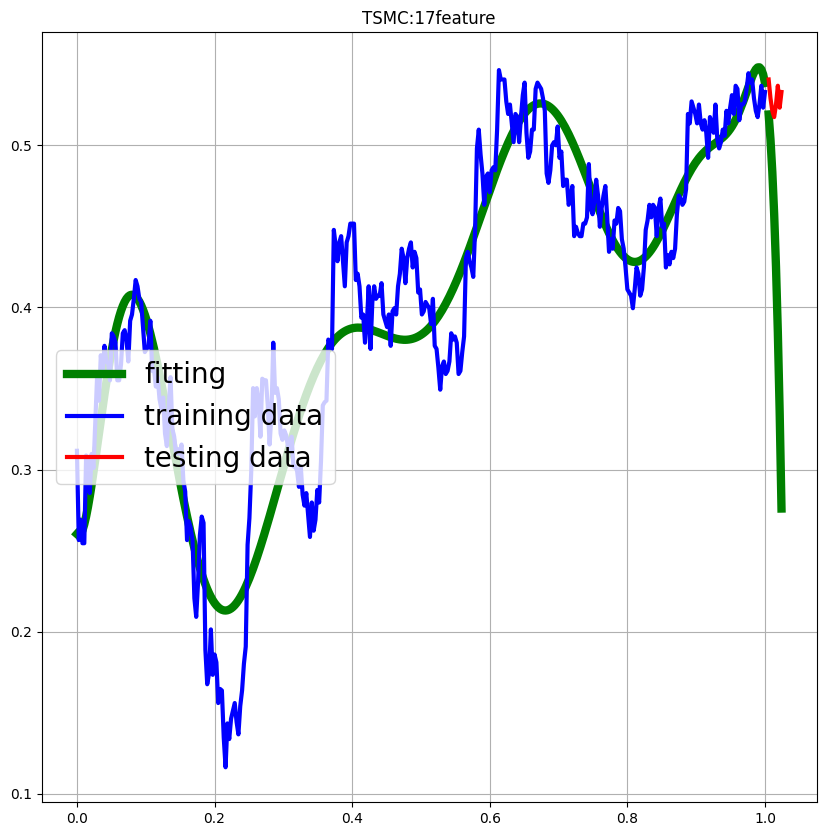

訓練錯誤有多少: 0.5013183856332
測試錯誤有多少: 0.48493640022514967


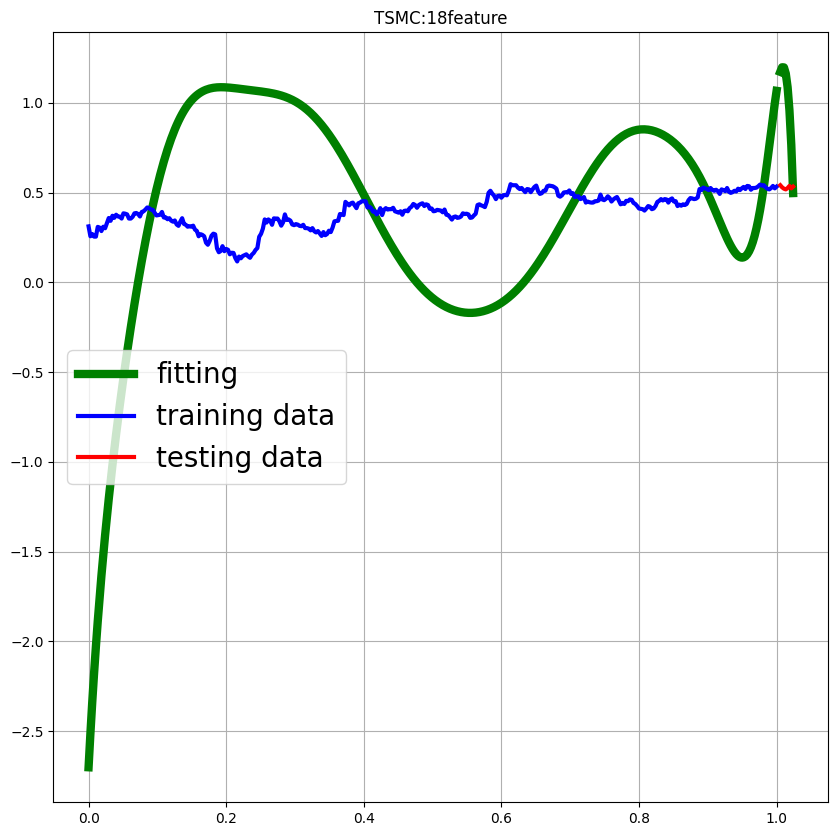

訓練錯誤有多少: 0.032787297373842346
測試錯誤有多少: 0.26352793916687367


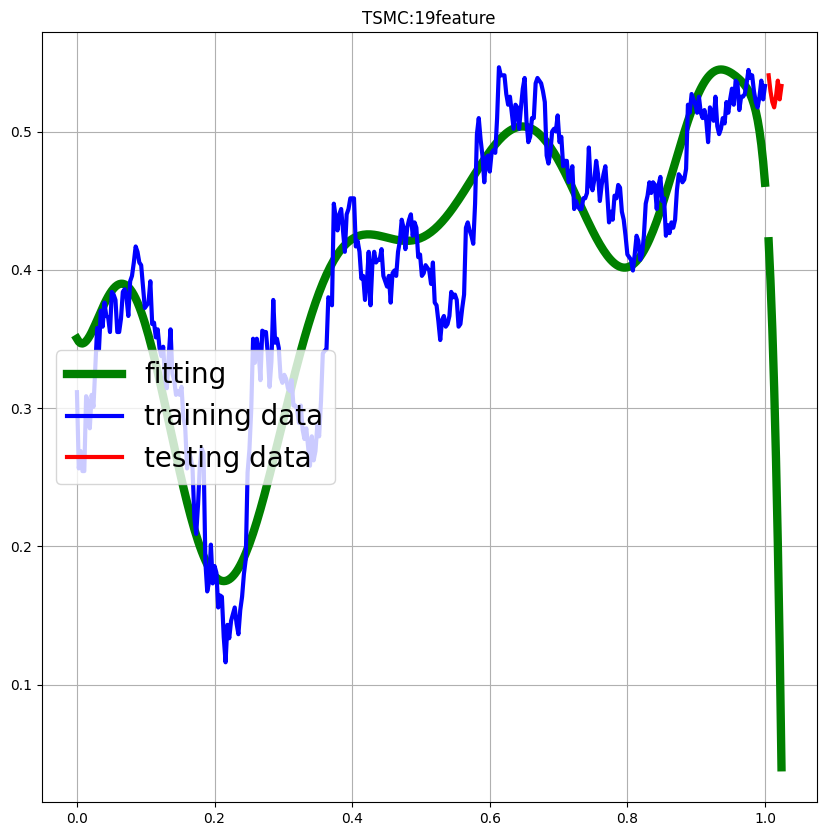

訓練錯誤有多少: 0.042353770758026585
測試錯誤有多少: 0.3102912629833582


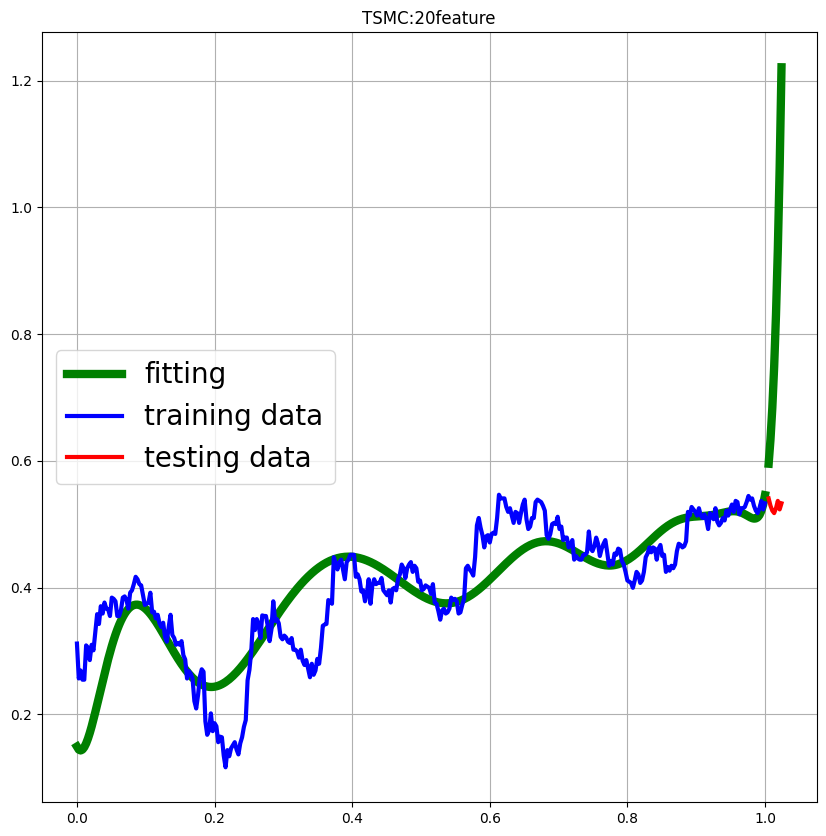

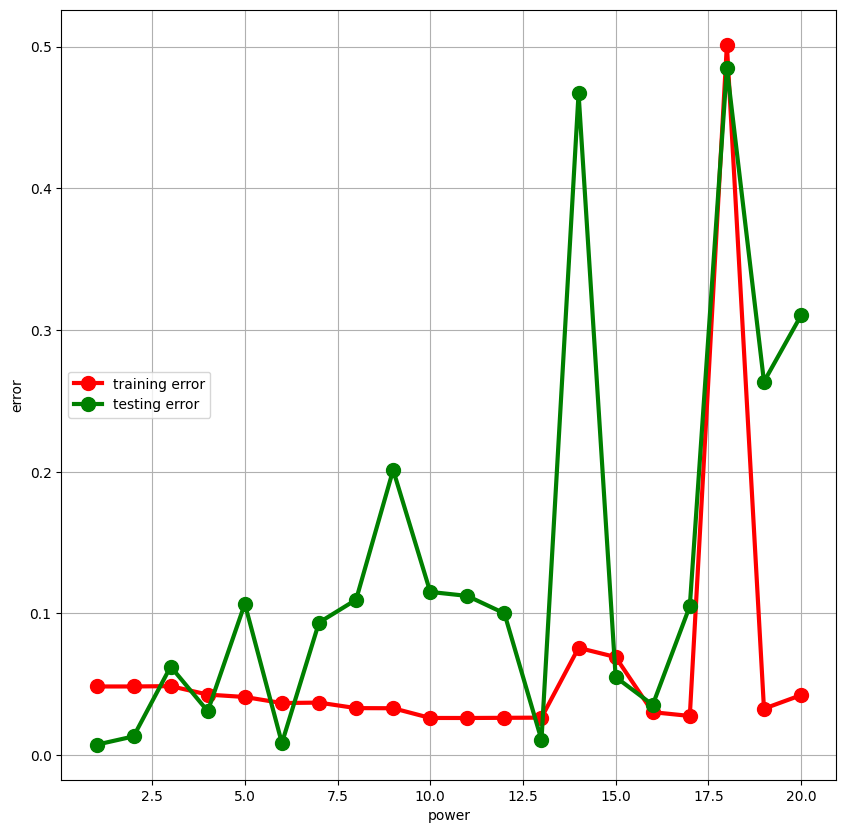

In [28]:
# 給予20個去算錯誤率
errorX = np.zeros(20)
errory_train = np.zeros(20)
errory_test = np.zeros(20)
for i in range(1,21):
  errorX[i-1] = i # i-1 第0個位置
  errory_train[i-1], errory_test[i-1] = Polynomial_regression(i, x, y, test_x, test_y)

plt.rcParams['figure.figsize'] = (10,10)
# r-o 線格式
plt.plot(errorX, errory_train, 'r-o', linewidth=3, markersize=10, label='training error')
plt.plot(errorX, errory_test, 'g-o', linewidth=3, markersize=10, label='testing error')
plt.xlabel('power')
plt.ylabel('error')
plt.legend(loc=6)
plt.grid()
plt.show()

##### 練習

In [29]:
a1 = np.array([[1,2,3], [4,5,6], [7,8,9]])
a1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [30]:
b1 = np.array([[10,20,30], [40,50,60], [70,80,90]])
b1

array([[10, 20, 30],
       [40, 50, 60],
       [70, 80, 90]])

In [31]:
a1 + b1

array([[11, 22, 33],
       [44, 55, 66],
       [77, 88, 99]])

In [32]:
a1 - b1

array([[ -9, -18, -27],
       [-36, -45, -54],
       [-63, -72, -81]])

In [33]:
a1 * b1

array([[ 10,  40,  90],
       [160, 250, 360],
       [490, 640, 810]])

In [34]:
a1 / b1

array([[0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1]])

###### 內積 .dot 範例

In [35]:
a2 = np.array([[2,1], [3,4]])
b2 = np.array([[5,6], [7,8]])

In [36]:
a2

array([[2, 1],
       [3, 4]])

In [37]:
b2

array([[5, 6],
       [7, 8]])

In [38]:
# 算內積
# C = AB 成積之合
# C(1,1) = 2*5+1*7 = 17
# C(1,2) = 2*6+1*8 = 20
# C(2,1) = 3*5+4*7 = 43
# C(2,2) = 3*6+4*8 = 50
a2.dot(b2)

array([[17, 20],
       [43, 50]])

In [39]:
b2.dot(a2)

array([[28, 29],
       [38, 39]])

###### 逆矩陣

np.linalg.inv

加起來的數值必須是偶數，否則error(會發生例外)

In [40]:
a3 = ([1,2,3], [4,5,6], [7,8,9])


##### 干擾因子

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# 隨機種子: 如果沒寫，每次取出的亂數皆不同
np.random.seed(0)
# 高斯分布: 變異數(標準差)為1，平均為0
np.random.randn(100)

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.05

In [43]:
np.random.randn(2,4) # 二維，一組四個

array([[ 1.8831507 , -1.34775906, -1.270485  ,  0.96939671],
       [-1.17312341,  1.94362119, -0.41361898, -0.74745481]])

###### 股票走法

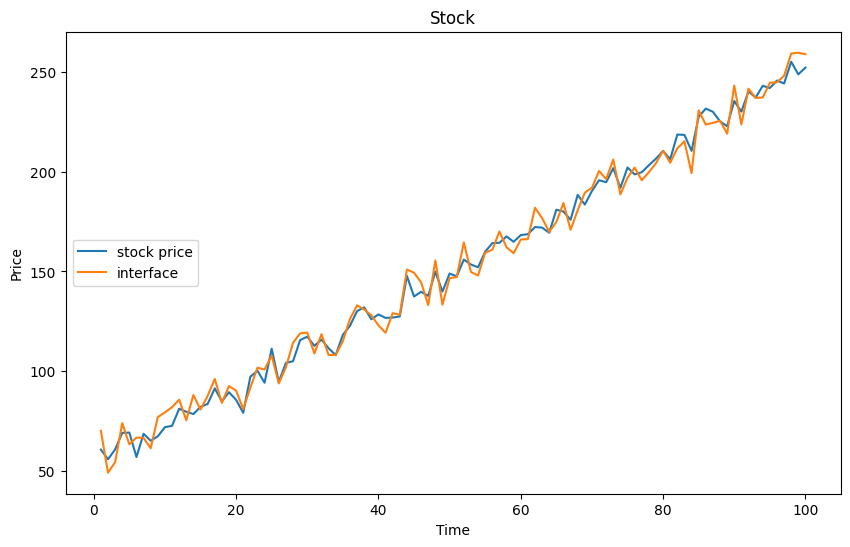

In [44]:
# 隨機產生股票價格
np.random.seed(0)
time = np.arange(1,101)

# 股價
stock_price = 50 + 2*time + np.random.randn(100)*5

# 隨機產生干擾因子(變因); 通常在線性回歸中
interface = np.random.randn(100)*5

# 干擾因子影響的股價
interface_stock_price = stock_price + interface

# 股價走法
plt.figure(figsize=(10,6))
plt.plot(time, stock_price, label='stock price')
plt.plot(time, interface_stock_price, label='interface')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=6)
plt.title('Stock')
plt.show()

In [50]:
# 線性迴歸輸出模型
from sklearn.linear_model import LinearRegression

# 建模
model = LinearRegression()

# 訓練
# 改成所需大小並加入干擾因子
model.fit(time.reshape(-1, 1), interface_stock_price)

LinearRegression()

In [49]:
# 預測
# 抓取係數(斜率)
info = model.coef_[0]
info

1.9557881719137495

In [48]:
# 抓取截距
intercept = model.intercept_
intercept

52.941802249767264

In [51]:
# 股票價格公式
print(f"Stock_price = {info:.2f} * time + {intercept:.2f}")

Stock_price = 1.96 * time + 52.94
